In [15]:
# %pip install seaborn
# %pip install xgboost

In [16]:
# read the csv file as a dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./dataset/heart_90.csv')

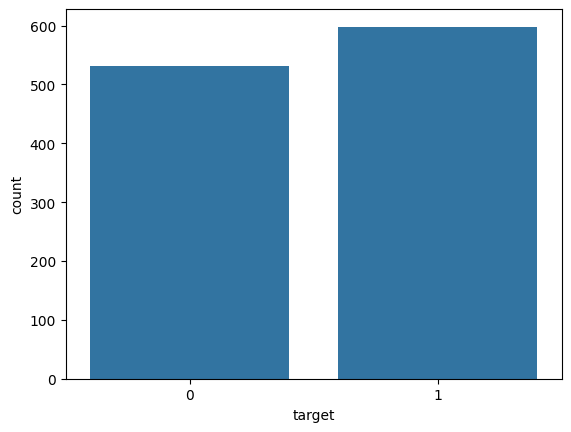

In [17]:
# plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.show()

In [18]:
df.shape

(1130, 12)

In [19]:
y = df['target']
X = df.drop('target',axis = 1)

X.shape, y.shape

((1130, 11), (1130,))

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state = 42,test_size=0.2)

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost
from xgboost import XGBClassifier
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# MLP Neural Network
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [22]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

c:\Users\HP\Documents\classification_model\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\Documents\classification_model\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


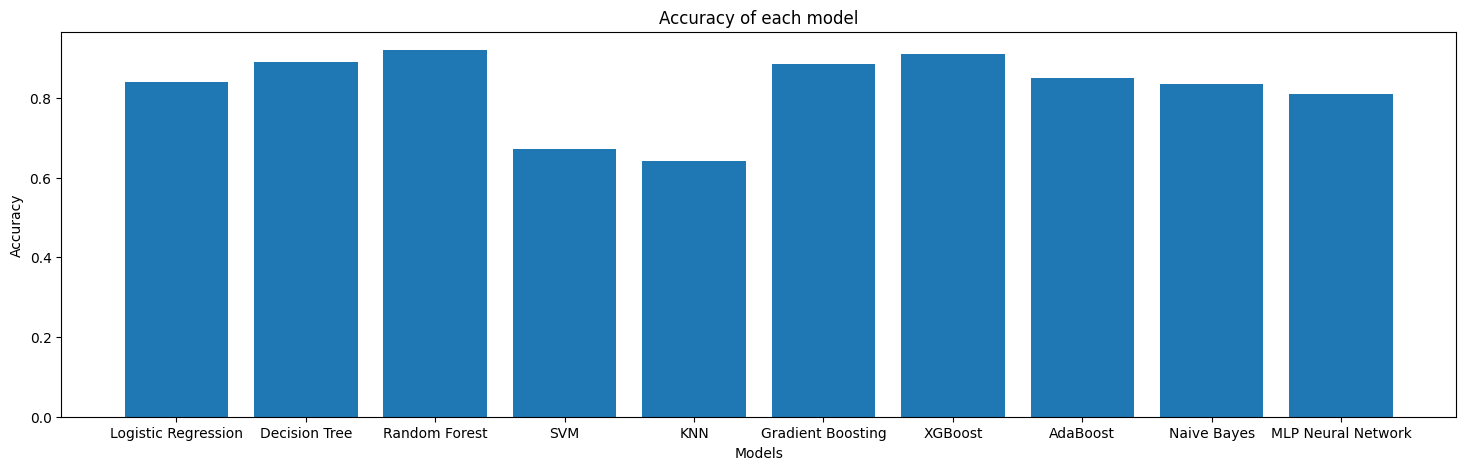

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store model names and accuracies
model_names = []
model_accuracies = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append model name and accuracy to the lists
    model_names.append(name)
    model_accuracies.append(accuracy)

# Plotting accuracy of each model
plt.figure(figsize=(18, 5))
plt.bar(model_names, model_accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of each model')
plt.show()

In [24]:
# print the best model name
best_model_index = np.argmax(model_accuracies)
best_model_name = model_names[best_model_index]
best_model_name

'Random Forest'

In [25]:
# save the model after training
import joblib
joblib.dump(models[best_model_name], 'model.pkl')

['model.pkl']

In [26]:
# Load the saved model
loaded_model = joblib.load('model.pkl')

# csv file zero shote
df = pd.read_csv('./dataset/heart_10.csv')

In [27]:
# Assuming 'target' is your target column
features = df.drop('target', axis=1)

# Make predictions on the new data
predictions = loaded_model.predict(features)

In [28]:
# calculate the accuracy of the model
accuracy = accuracy_score(df['target'], predictions)
accuracy

0.9333333333333333